In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Clustering (군집화)

*   대표적인 비지도 학습 알고리즘
*   target (or label)이 없는 데이터의 구조나 패턴을 찾아 그룹화 하는 알고리즘

ex) MiniBatch K Mean / Mean Shift / Spectral Clustering / Ward / Agglomerative Clustering / DBSCAN / OPTICS / Birch / GaussianMixture 



In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [23]:
def plot_data(dataset, position, title):
  X, y = dataset
  plt.subplot(position)
  plt.title(title)
  plt.scatter(X[:, 0], X[:, 1])

In [25]:
np.random.seed(0)
n_samples = 1000
random_state = 0
noise = 0.05

circles = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = noise, random_state = random_state)
moons = datasets.make_moons(n_samples = n_samples, noise = noise, random_state = random_state)
blobs = datasets.make_blobs(n_samples = n_samples, random_state = random_state)
no_structures = np.random.rand(n_samples, 2), None

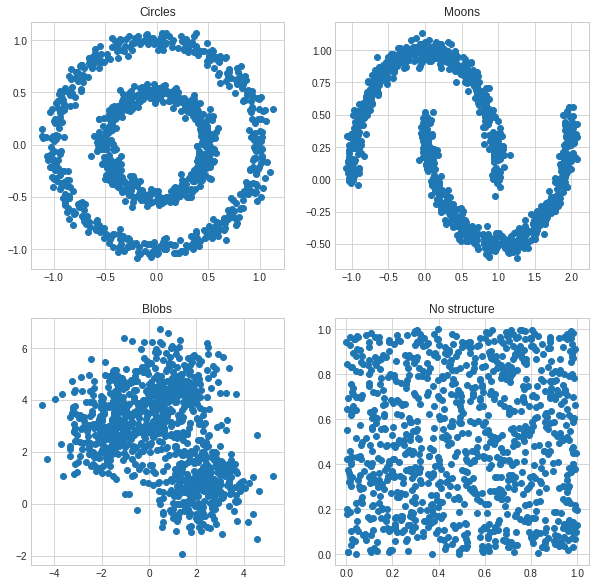

In [26]:
plt.figure(figsize = (10,10))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No structure')

In [56]:
def fit_predict_plot(model, dataset, position, title):
  X, y = dataset
  model.fit(X)

  if hasattr(model, 'labels_'):
    labels = model.labels_.astype(int)
  else : 
    labels = model.predict(X)

  colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D9E', '#D81159', '#8CD790', '#353866'])    # HTML 색 조합
  # print(labels)
  ax = plt.subplot(position)
  ax.set_title(title)
  ax.scatter(X[:, 0], X[:, 1], color = colors[labels])

# K-means

*   군집의 개수 (K)를 입력받아 등분산 그룹으로 군집화

*   제곱합 함수를 최소화한다.

*   각 군집의 중심점을 찾는 것을 목표.

*   군집 내의 데이터는 중심점과 가능한 가까이 있어야 되며, 군집 간 외각 데이터 끼리의 거리는 가능한 멀리 있어야 한다. 

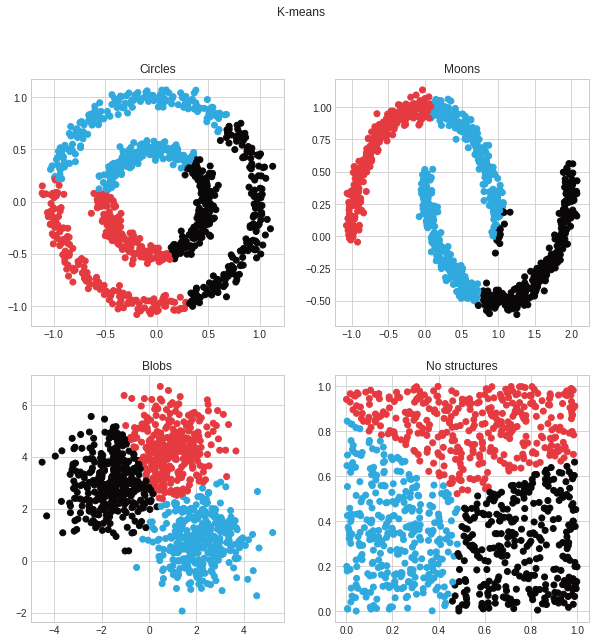

In [57]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('K-means')

fit_predict_plot(cluster.KMeans(n_clusters = 3, random_state = random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters = 3, random_state = random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters = 3, random_state = random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters = 3, random_state = random_state), no_structures, 224, 'No structures')

In [66]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

model = cluster.KMeans(n_clusters = 3)
model.fit(cancer.data)
predict = model.predict(cancer.data)

class_0_idx = np.where(predict == 0)
print(cancer.target[class_0_idx])

class_1_idx = np.where(predict == 1)
print(cancer.target[class_1_idx])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

# Mini Batch K-Means (미니 배치 K-평균)

*   K-means 에 미니배치를 적용해 연산 시간을 줄인 기법

*   k-means과 결과가 동일하진 않음.

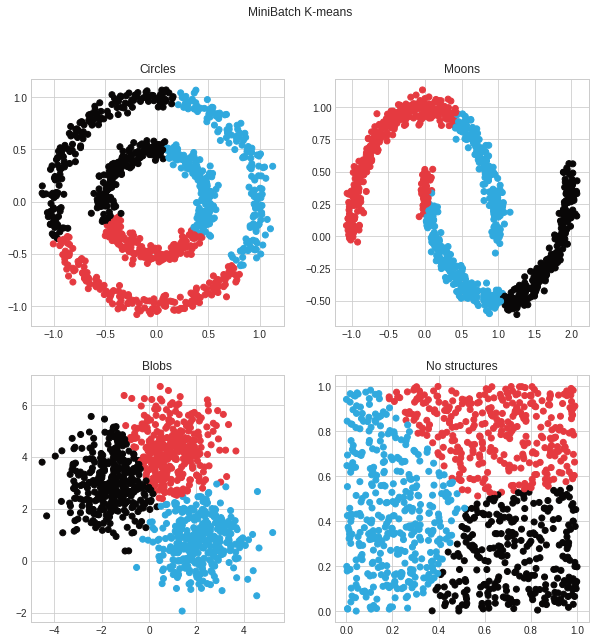

In [58]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('MiniBatch K-means')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 3, random_state = random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 3, random_state = random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 3, random_state = random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters = 3, random_state = random_state), no_structures, 224, 'No structures')

# Affinity Propagation

*   샘플을 대표하는 적절한 예를 찾을 때까지 샘플 간 메시지는 보내 군집 생성을 반복한다. ( 군집을 대표할 조건을 찾음)

*   군집의 수는 자동으로 갱신

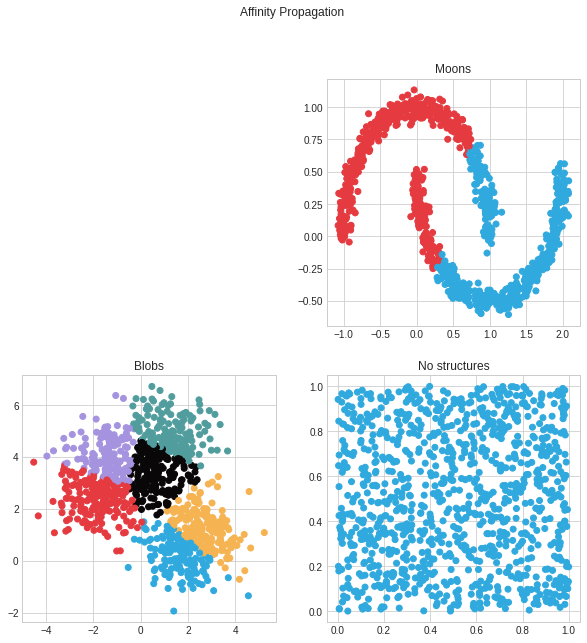

In [59]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Affinity Propagation')

# fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference = -200), circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference = -200), moons, 222, 'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference = -200), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping = 0.9, preference = -200), no_structures, 224, 'No structures')

# Mean Shift

*   중심점 후보를 정해진 구역 내 평균으로 업데이트

*  둥근 형태의 데이터들에 유리함.

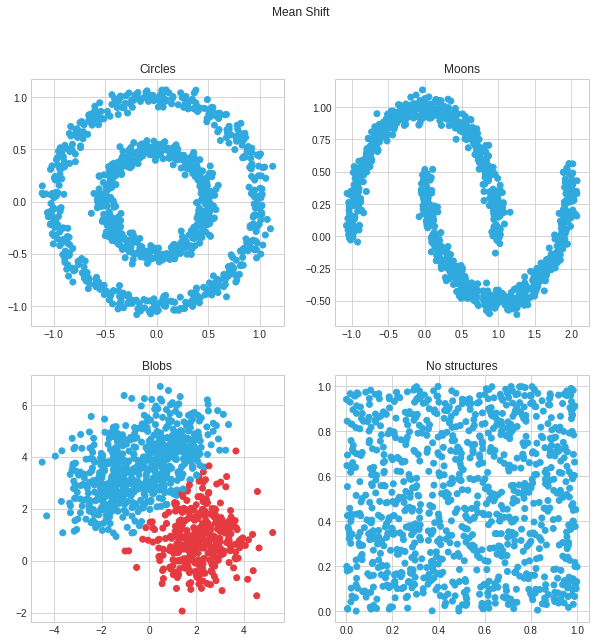

In [60]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Mean Shift')

fit_predict_plot(cluster.MeanShift(), circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(), moons, 222, 'Moons')
fit_predict_plot(cluster.MeanShift(), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(), no_structures, 224, 'No structures')

# Spectral Clustering (스펙트럼 군집화)

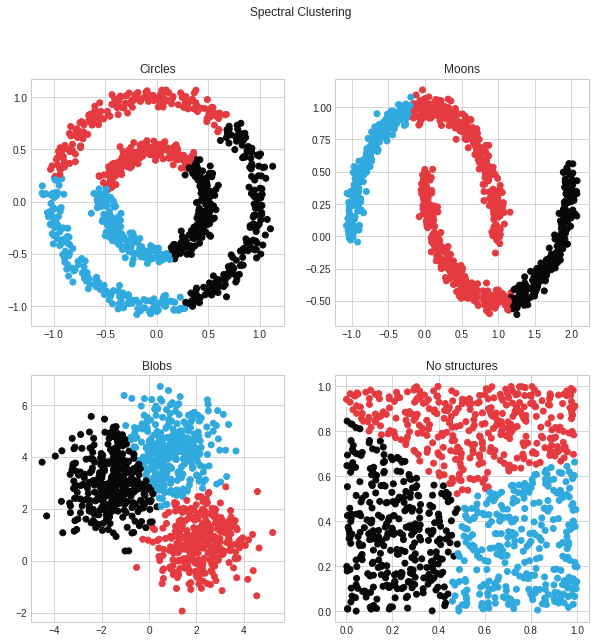

In [61]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters = 3, random_state = random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters = 3, random_state = random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters = 3, random_state = random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters = 3, random_state = random_state), no_structures, 224, 'No structures')

# Hierarchical Clustering (계층 군집화)

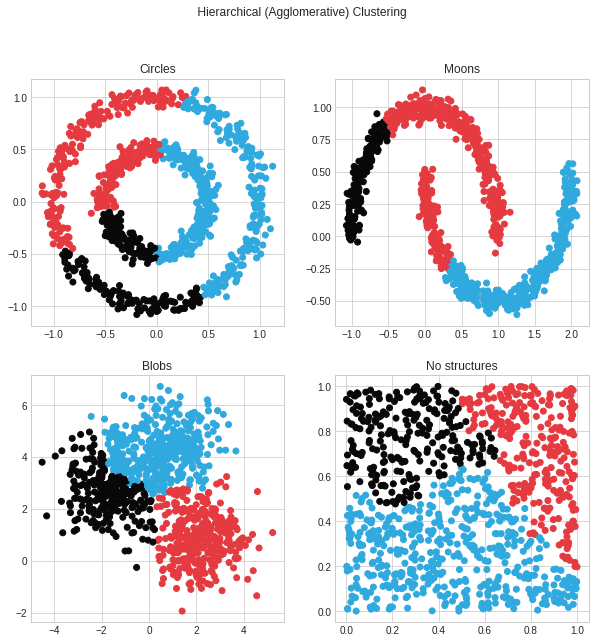

In [62]:
fig = plt.figure(figsize = (10,10))
fig.suptitle(' Hierarchical (Agglomerative) Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters = 3, linkage = 'ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters = 3, linkage = 'ward'), moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters = 3, linkage = 'ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters = 3, linkage = 'ward'), no_structures, 224, 'No structures')

# DBSCAN (Density - Based Spatial Clustering of Applications with Noise)

*   밀도 기반

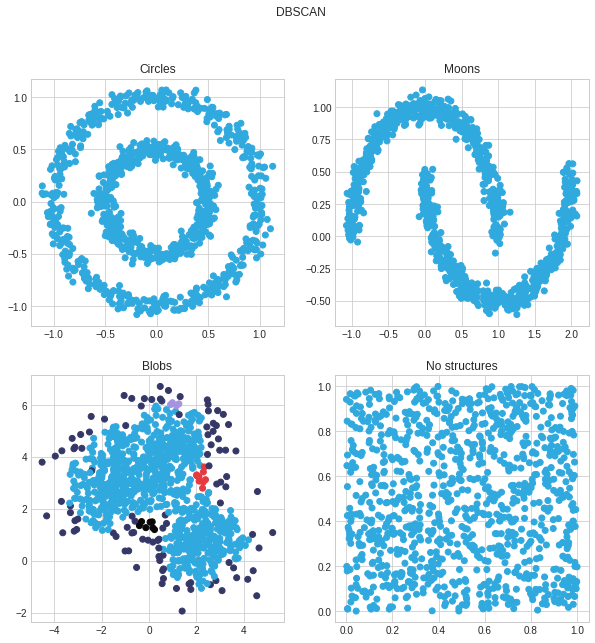

In [63]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('DBSCAN')

fit_predict_plot(cluster.DBSCAN(eps = 0.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps = 0.3), moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps = 0.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps = 0.3), no_structures, 224, 'No structures')

# OPTICS (Ordering Points To Identify the Clustering Structures)

*   Ordering 특성이 있는 경우 성능이 좋으나, 아무런 특성이 없는 경우 성능이 저조하다.

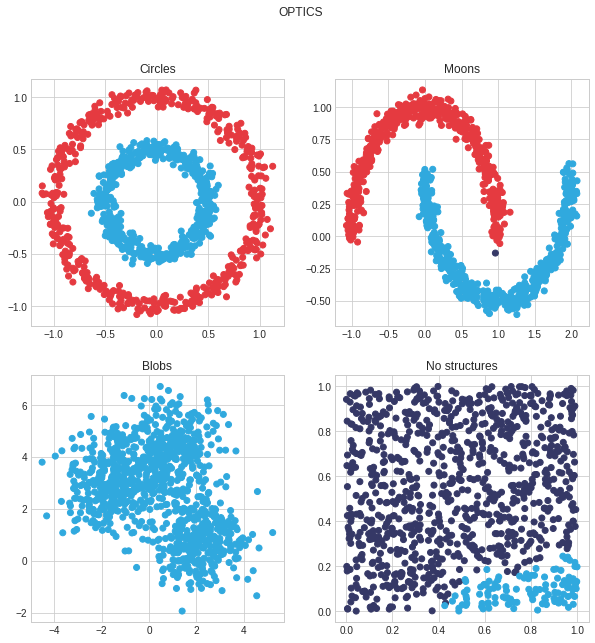

In [65]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('OPTICS')

fit_predict_plot(cluster.OPTICS(min_samples = 20, xi = 0.05, min_cluster_size = 0.1), circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples = 20, xi = 0.05, min_cluster_size = 0.1), moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples = 20, xi = 0.05, min_cluster_size = 0.1), blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples = 20, xi = 0.05, min_cluster_size = 0.1), no_structures, 224, 'No structures')

# Birch (Balanced iterative reducing and clustering using hierarchies)

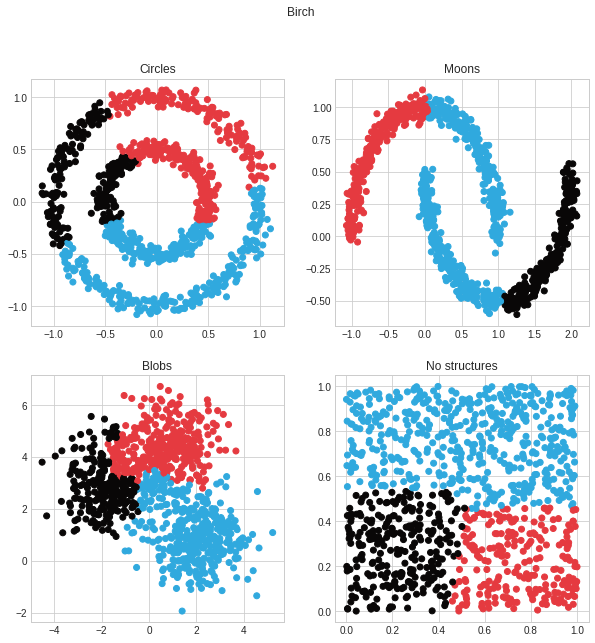

In [68]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Birch')

fit_predict_plot(cluster.Birch(n_clusters = 3, threshold = 0.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters = 3, threshold = 0.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters = 3, threshold = 0.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters = 3, threshold = 0.3), no_structures, 224, 'No structures')